# <center><font color='silver'>**Coding 1: Data Management and Analysis with Python**</font></center>
### <center><font color='silver'>Central European University, 2024-2025</font></center>
### <center><font color='silver'>Assignment 1</font></center>

In [2]:
import os
import warnings

import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from stargazer.stargazer import Stargazer
import math

import matplotlib.pyplot as plt
import seaborn as sns
from utils.utils import lspline # watch the syntax here

warnings.filterwarnings('ignore')

In [3]:
%matplotlib inline

## Data - Used Cars

In [4]:
path = os.path.join('data', 'used-cars.csv') # this will produce a path with the right syntax for your operating system
path

'data/used-cars.csv'

In [5]:
data =  pd.read_csv(path)

In [6]:
data.head()

,pricestr,area,subarea,name,condition,cylinders,drive,fuel,odometer,paintcolor,...,dealer,price,lnprice,year,age,lnodometer,LE,XLE,SE,Hybrid
0,$4990,chicago,chicago city,2007 Toyota Camry Hybrid,good,4 cylinders,fwd,gas,11.6236,grey,...,1,4990,8.515191,2007,11,2.453038,0,0,0,1
1,$10625,chicago,chicago city,2009 Toyota Camry Hybrid,NaN,4 cylinders,fwd,hybrid,4.3702,grey,...,1,10625,9.270965,2009,9,1.474809,0,0,0,1
2,$14850,chicago,chicago city,2015 Toyota_ Camry_,excellent,other,NaN,gas,3.5721,NaN,...,1,14850,9.605755,2015,3,1.273154,0,0,0,0
3,$15630,chicago,chicago city,2016 TOYOTA CAMRY,NaN,NaN,fwd,gas,1.3152,NaN,...,1,15630,9.656947,2016,2,0.273989,0,0,0,0
4,$850,chicago,chicago city,1993 toyota camry,good,6 cylinders,fwd,gas,18.7000,red,...,0,850,6.745236,1993,25,2.928523,0,0,0,0


<hr>

## Preprocessing

In [7]:
data.describe()

,odometer,dealer,price,lnprice,year,age,lnodometer,LE,XLE,SE,Hybrid
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,13.031974,0.227687,5866.153005,8.299096,2005.816029,12.183971,2.416037,0.191257,0.060109,0.085610,0.041894
std,7.197456,0.419722,5657.673934,1.018207,5.887079,5.887079,0.637327,0.393649,0.237906,0.280043,0.200530
min,0.070000,0.000000,1.000000,0.000000,1991.000000,1.000000,-2.659260,0.000000,0.000000,0.000000,0.000000
25%,8.304974,0.000000,2400.000000,7.783224,2002.000000,8.000000,2.116855,0.000000,0.000000,0.000000,0.000000
50%,13.655900,0.000000,4300.000000,8.366370,2006.000000,12.000000,2.614172,0.000000,0.000000,0.000000,0.000000
75%,16.450363,0.000000,8299.000000,9.023891,2010.000000,16.000000,2.800348,0.000000,0.000000,0.000000,0.000000
max,118.000000,1.000000,90002.000000,11.407587,2017.000000,27.000000,4.770685,1.000000,1.000000,1.000000,1.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   pricestr      549 non-null    object 
 1   area          549 non-null    object 
 2   subarea       540 non-null    object 
 3   name          549 non-null    object 
 4   condition     327 non-null    object 
 5   cylinders     360 non-null    object 
 6   drive         294 non-null    object 
 7   fuel          548 non-null    object 
 8   odometer      549 non-null    float64
 9   paintcolor    316 non-null    object 
 10  size          193 non-null    object 
 11  transmission  549 non-null    object 
 12  type          301 non-null    object 
 13  dealer        549 non-null    int64  
 14  price         549 non-null    int64  
 15  lnprice       549 non-null    float64
 16  year          549 non-null    int64  
 17  age           549 non-null    int64  
 18  lnodometer    549 non-null    

In [9]:
data.area.value_counts()

area
chicago        327
los angeles    222
Name: count, dtype: int64

<hr>

### Note: needed and important variables for further analysis

- area: used cars' area - Chicago
- area: Los Angeles for external validity
- price: price of used cars
- lnprice: log transformed price
- age: years after manufacturing

In [10]:
data_needed = data[['area', 'price', 'lnprice', 'age', 'odometer']]

In [11]:
data_chicago = data_needed[data_needed['area'] == 'chicago']
data_los_angeles = data_needed[data_needed['area'] == 'los angeles']

In [12]:
data_los_angeles

,area,price,lnprice,age,odometer
265,los angeles,9750,9.185022,8,4.600000
280,los angeles,2300,7.740665,20,18.887000
283,los angeles,1540,7.339538,9,16.450363
293,los angeles,9750,9.185022,8,4.600000
301,los angeles,6999,8.853522,9,12.760000
...,...,...,...,...,...
544,los angeles,1,0.000000,14,11.300000
545,los angeles,6800,8.824677,6,8.304974
546,los angeles,2000,7.600903,10,12.548112
547,los angeles,2700,7.901007,16,16.100000


In [13]:
data_chicago

,area,price,lnprice,age,odometer
0,chicago,4990,8.515191,11,11.623600
1,chicago,10625,9.270965,9,4.370200
2,chicago,14850,9.605755,3,3.572100
3,chicago,15630,9.656947,2,1.315200
4,chicago,850,6.745236,25,18.700000
...,...,...,...,...,...
331,chicago,5499,8.612322,15,15.700000
332,chicago,2800,7.937375,18,21.210000
333,chicago,10800,9.287301,8,14.664000
335,chicago,500,6.214608,4,4.791687


##### Checking for NA values

In [14]:
data_chicago.isna().sum()

area        0
price       0
lnprice     0
age         0
odometer    0
dtype: int64

In [15]:
data_los_angeles.isna().sum()

area        0
price       0
lnprice     0
age         0
odometer    0
dtype: int64

In [16]:
data_chicago.describe()

,price,lnprice,age,odometer
count,327.000000,327.000000,327.000000,327.000000
mean,5964.972477,8.361121,12.189602,13.058920
std,4524.059498,0.881263,5.978039,8.026748
min,206.000000,5.327876,1.000000,0.231900
25%,2300.000000,7.740665,7.000000,8.139400
50%,4400.000000,8.389359,12.000000,13.800000
75%,8967.500000,9.101361,17.000000,16.526650
max,18495.000000,9.825255,27.000000,118.000000


In [17]:
data_los_angeles.describe()

,price,lnprice,age,odometer
count,222.000000,222.000000,222.000000,222.000000
mean,5720.594595,8.207735,12.175676,12.992284
std,7010.304712,1.187883,5.763887,5.780256
min,1.000000,0.000000,1.000000,0.070000
25%,2400.000000,7.783224,8.250000,8.354975
50%,3950.000000,8.281471,12.000000,13.250000
75%,7571.250000,8.932099,16.000000,16.450363
max,90002.000000,11.407587,27.000000,37.000000


In [18]:
data_chicago.price.describe()

count      327.000000
mean      5964.972477
std       4524.059498
min        206.000000
25%       2300.000000
50%       4400.000000
75%       8967.500000
max      18495.000000
Name: price, dtype: float64

In [19]:
data_los_angeles.price.describe()

count      222.000000
mean      5720.594595
std       7010.304712
min          1.000000
25%       2400.000000
50%       3950.000000
75%       7571.250000
max      90002.000000
Name: price, dtype: float64

<hr>

## Feature Engineering

In [20]:
data_chicago['agesq'] = np.power(data_chicago.age, 2)
data_los_angeles['agesq'] = np.power(data_los_angeles.age, 2)

In [21]:
data_chicago.head()

,area,price,lnprice,age,odometer,agesq
0,chicago,4990,8.515191,11,11.6236,121
1,chicago,10625,9.270965,9,4.3702,81
2,chicago,14850,9.605755,3,3.5721,9
3,chicago,15630,9.656947,2,1.3152,4
4,chicago,850,6.745236,25,18.7000,625


In [22]:
data_los_angeles.head()

,area,price,lnprice,age,odometer,agesq
265,los angeles,9750,9.185022,8,4.600000,64
280,los angeles,2300,7.740665,20,18.887000,400
283,los angeles,1540,7.339538,9,16.450363,81
293,los angeles,9750,9.185022,8,4.600000,64
301,los angeles,6999,8.853522,9,12.760000,81


##### We will drop relatively new cars with prices below 1000 because it is unlikely that relatively new cars cost very cheap.

In [23]:
data_chicago = data_chicago[~((data_chicago.price < 1000) & (data_chicago.age < 10))]

In [24]:
data_chicago['price'].describe()

count      322.000000
mean      6050.745342
std       4505.891217
min        450.000000
25%       2424.750000
50%       4500.000000
75%       8991.250000
max      18495.000000
Name: price, dtype: float64

In [25]:
data_chicago['lnprice'].describe()

count    322.000000
mean       8.397206
std        0.837460
min        6.109248
25%        7.793330
50%        8.411833
75%        9.104007
max        9.825255
Name: lnprice, dtype: float64

In [26]:
data_chicago['age'].describe()

count    322.000000
mean      12.310559
std        5.941811
min        1.000000
25%        7.250000
50%       12.000000
75%       17.000000
max       27.000000
Name: age, dtype: float64

<hr>

## Distributions

##### Sorting in ascending order the chicago dataset based on age

In [27]:
data_chicago.sort_values(by = 'age', ascending = True, inplace = True) # we only do it for plotting purposes, linear regression does not require sorted data
data_chicago.reset_index(drop = True, inplace = True)

Sorting in ascending order the los angeles dataset based on age

In [28]:
data_los_angeles.sort_values(by = 'age', ascending = True, inplace = True) # we only do it for plotting purposes, linear regression does not require sorted data
data_los_angeles.reset_index(drop = True, inplace = True)

In [29]:
data_chicago.head()

,area,price,lnprice,age,odometer,agesq
0,chicago,18495,9.825255,1,0.231900,1
1,chicago,16900,9.735069,1,1.872817,1
2,chicago,16499,9.711055,1,2.943900,1
3,chicago,15995,9.680032,1,5.491100,1
4,chicago,14995,9.615472,2,4.095000,4


In [30]:
data_los_angeles.head()

,area,price,lnprice,age,odometer,agesq
0,los angeles,18500,9.825526,1,0.500000,1
1,los angeles,17000,9.740969,1,2.000000,1
2,los angeles,361,5.888878,1,0.070000,1
3,los angeles,12700,9.449357,2,4.249044,4
4,los angeles,14995,9.615472,2,6.546700,4


<hr>

### Eyeballing the distribtuions

### Chicago dataset

`price`

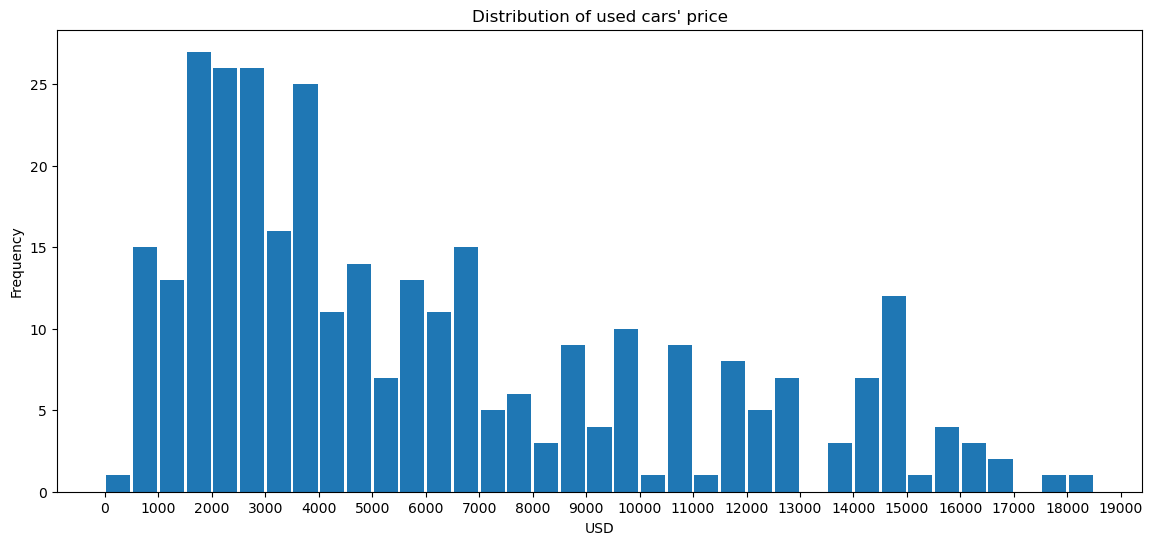

In [31]:
data_chicago.price.plot(
    kind = 'hist',  bins = range(0, 19000, 500), rwidth = 0.9
    , figsize = (14,6)
    , xticks = range(0, 19001, 1000)
    , xlabel = 'USD'
    , title = 'Distribution of used cars\' price'
);

##### It can be seen from the above chart that the distribtion of used car's `price` is not normally distributed with long right tail. So, normalization is needed with the help of taking `ln`
<hr>

`lnprice`

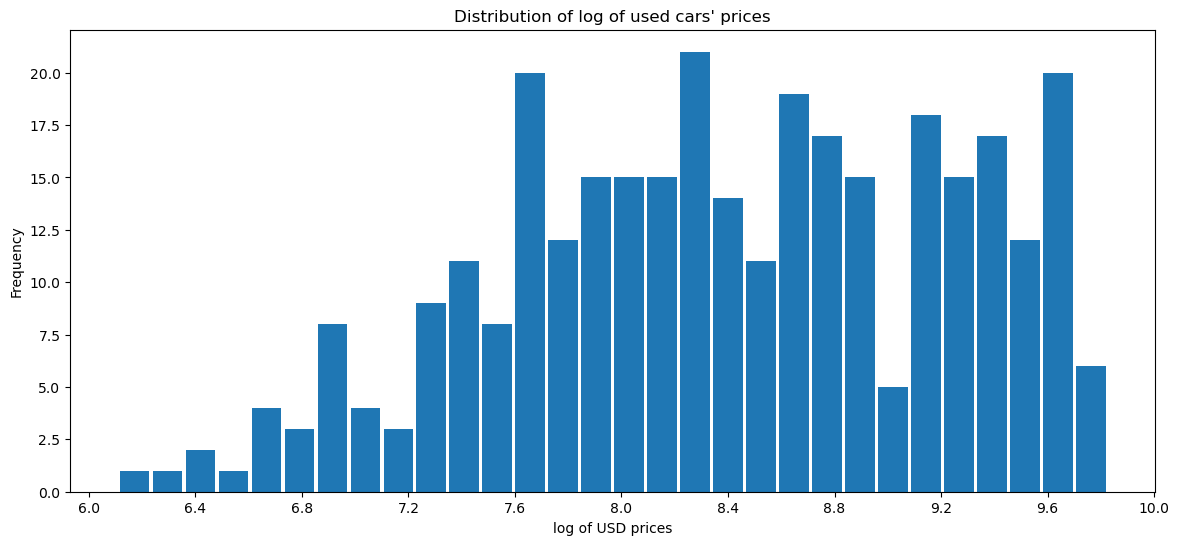

In [32]:
data_chicago.lnprice.plot(
    kind = 'hist',  rwidth = 0.9, bins = 30
    , figsize = (14,6)
    , xticks = np.linspace(6, 10, 11)
    , xlabel = 'log of USD prices'
    , title = 'Distribution of log of used cars\' prices'
);

##### It can be seen from the above chart that the distribtion of used car's `lnprice` is more normally distributed with values clustering around mean.
<hr>

`age`

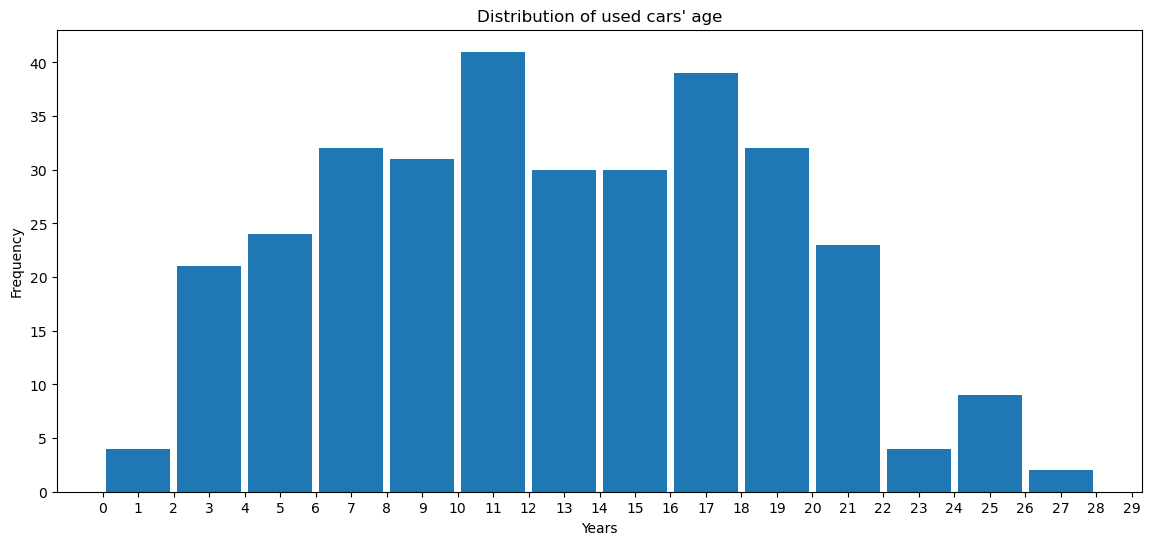

In [33]:
data_chicago.age.plot(
    kind = 'hist',  bins = range(0, 30, 2), rwidth = 0.9
    , figsize = (14,6)
    , xticks = range(0, 30, 1)
    , xlabel = 'Years'
    , title = 'Distribution of used cars\' age'
);

##### It can be seen from the above chart that the distribtion of used car's `age` is more normally distributed with values clustering around mean.

<hr>

### **Plotting the point-by-point relationship between distance from city center and price**

`Lowess`

`price` vs `age`

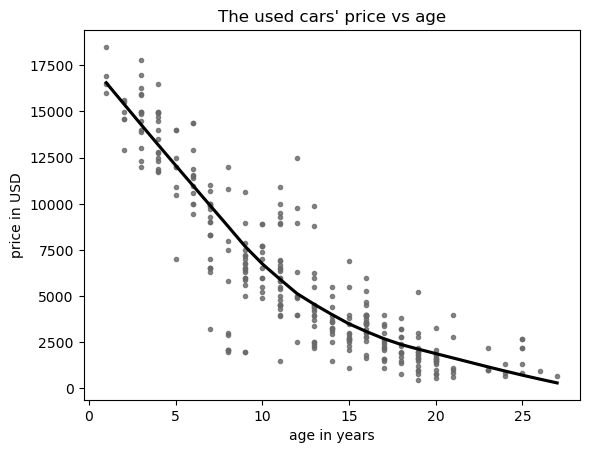

In [34]:
sns.regplot(
    data = data_chicago, x = 'age', y = 'price'
    , marker = '.'
    , fit_reg = True, lowess = True
    , scatter_kws = {'color': 'dimgrey'}
    , line_kws = {'color': 'k'}
)
plt.xlabel('age in years')
plt.ylabel('price in USD')
plt.title('The used cars\' price vs age');

##### The above graph demostrates the well job done by lowess in capturing the true negative relationship between price and age

<hr>

## Models: Comparing Linear and Non-Linear Patterns

#### Lowess model

##### Note: the result of a lo(w)ess regression depends on the tools used. The values calculated below will be different compared to those seen on the `seaborn` regplot output.

In [35]:
lowess = sm.nonparametric.lowess
type(lowess)

function

##### We are getting function which for $x$ and $y$ input will return us the _fitted values_. 

In [36]:
y_hat_lowess = lowess(data_chicago.price, data_chicago.age)
y_hat_lowess[0:10]

array([[1.00000000e+00, 1.65559298e+04],
       [1.00000000e+00, 1.65559298e+04],
       [1.00000000e+00, 1.65559298e+04],
       [1.00000000e+00, 1.65559298e+04],
       [2.00000000e+00, 1.54274130e+04],
       [2.00000000e+00, 1.54274130e+04],
       [2.00000000e+00, 1.54274130e+04],
       [2.00000000e+00, 1.54274130e+04],
       [2.00000000e+00, 1.54274130e+04],
       [2.00000000e+00, 1.54274130e+04]])

In [37]:
lowes_fitted_values = [x[1] for x in y_hat_lowess]
lowes_fitted_values[0:10]

[16555.929800171485,
 16555.929800171485,
 16555.929800171485,
 16555.929800171485,
 15427.412986164267,
 15427.412986164267,
 15427.412986164267,
 15427.412986164267,
 15427.412986164267,
 15427.412986164267]

##### Note: these are *not predictions, but fitted values*. Lowess can fit a curve on our existing data but will not be able to give us a fitted value on a new data point. We can use interpolation to get a fitted estimate on a new observation but only if its $x$ value is between the min and max in our existing sample. 

<hr>

### Regression 1: Level-level

#### `price` vs `age`

In [38]:
regression_1 = smf.ols('price ~ age', data = data_chicago).fit(cov_type = 'HC0')

##### We are quantifying a linear relationship between price and age. The regression line in the plot below is what `seaborn` estimates and not the fitted values from or regression. The two lines, however, should match, as there is only one solution to the error minimization problem.

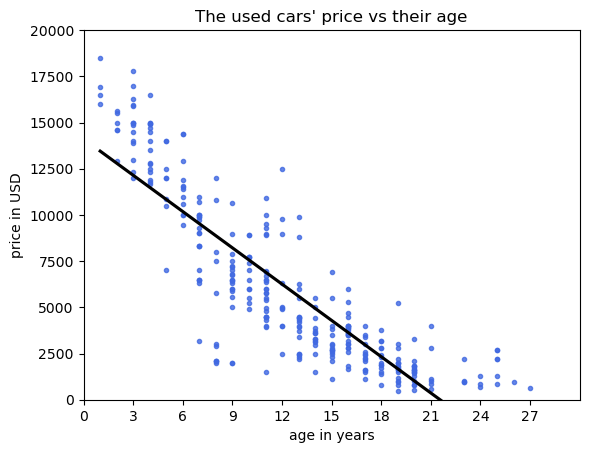

In [39]:
sns.regplot(
    data = data_chicago, x = 'age', y = 'price'
    , marker = '.', fit_reg = True , ci = None
    , scatter_kws = {'color': 'royalblue'}
    , line_kws = {'color': 'k'}
)
plt.xticks(ticks=range(0, 30, 3))
plt.xlim(0, 30)
plt.ylim(0, 20000)
plt.xlabel('age in years')
plt.ylabel('price in USD')
plt.title('The used cars\' price vs their age');

##### Regression summary

In [40]:
print(regression_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     708.1
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           4.27e-83
Time:                        17:58:39   Log-Likelihood:                -2945.6
No. Observations:                 322   AIC:                             5895.
Df Residuals:                     320   BIC:                             5903.
Df Model:                           1                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.411e+04    357.673     39.441      0.0

### Interpretation

- `intercept` - used cars that are new cost are expected to cost approximately 14110 USD, on average, holding everything fixed. 
    - Also, it is statistically significant based on p-value of 0.000 which means it strongly affects price.
<br><br>
- `age` - used cars that get older by 1 year are expected to be approximately 654.41 USD less expensive, on average, holding everything fixed. 
    - Also, it is statistically significant based on p-value of 0.000 which means it strongly affects price.
<br><br>
- `R-squared = 0.745` - 74.5% of the variation in price is captured by the model. 


<hr>

In [41]:
print('='*57)
print(regression_1.pvalues)
print('='*57)
print('The the p-value of age variable: {:.10f}'.format(regression_1.pvalues.age))
print('='*57)
print('Age t-value:', regression_1.tvalues.age)
print('='*57)
print('Age f-value:', regression_1.fvalue)
print('='*57)
print('Getting f-value from squaring t-value:', regression_1.tvalues.age**2)

Intercept     0.000000e+00
age          5.299664e-156
dtype: float64
The the p-value of age variable: 0.0000000000
Age t-value: -26.60929055768318
Age f-value: 708.0543439832073
Getting f-value from squaring t-value: 708.0543439832073


<hr>

In [42]:
data_chicago['price_fitted'] = regression_1.fittedvalues

##### We can add the lowess regression's fitted values to the regression plot as well. 

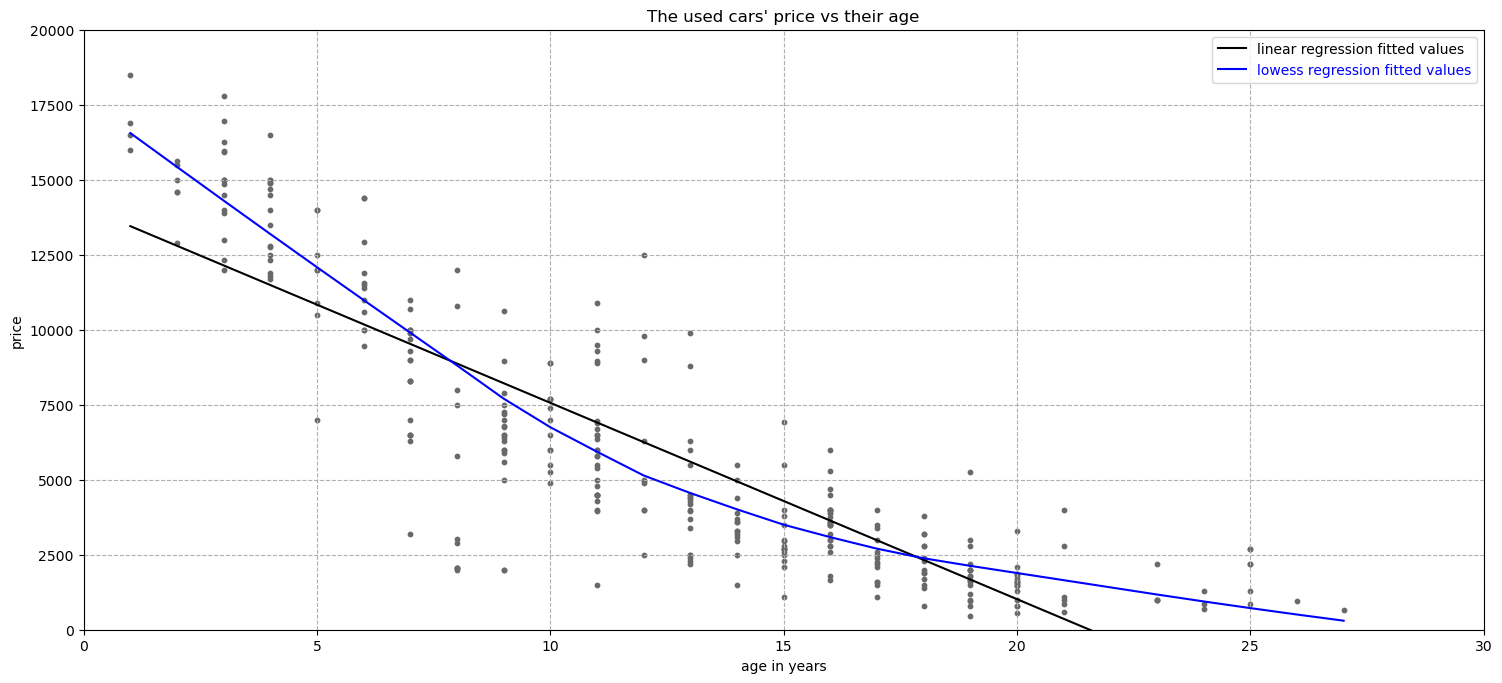

In [43]:
fig = plt.figure(figsize = (14,6))
ax = fig.add_axes([0,0,1,1])
ax.scatter(data_chicago.age, data_chicago.price, s = 10, color = 'dimgrey')
ax.plot(data_chicago.age, data_chicago.price_fitted, color = 'k', label ='linear regression fitted values')
ax.plot(data_chicago.age, lowes_fitted_values, color = 'blue', label ='lowess regression fitted values')
plt.xlim(0, 30)
plt.ylim(0, 20000)
plt.legend(labelcolor = ['black', 'blue'])
plt.xlabel('age in years')
plt.ylabel('price')
plt.grid(linestyle = '--')
plt.title('The used cars\' price vs their age');

##### The above graph shows combination of linear regression best fit and lowess best fit, where the former one shows negativel linear relationship between price and age, whereas the latter shows more steep decline in price for relatively new cars and more flat decline in price for old cars.

<hr>

### Regression 2: Log-Level

**`log price` vs `age`**

In [44]:
regression_2 = smf.ols('lnprice ~ age', data = data_chicago).fit(cov_type = 'HC0')

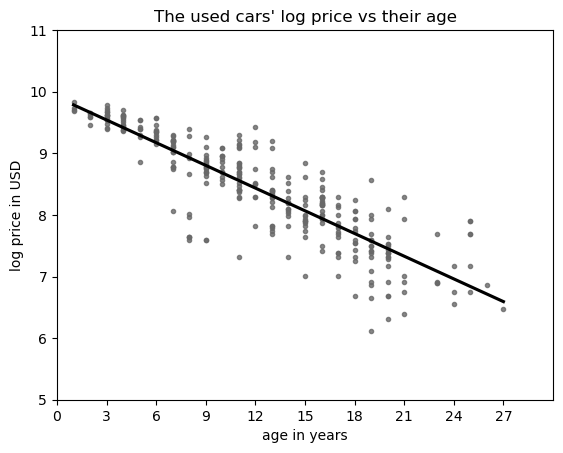

In [45]:
sns.regplot(
    data = data_chicago, x = 'age', y = 'lnprice'
    , marker = '.', fit_reg = True, ci = None
    , scatter_kws = {'color': 'dimgrey'}
    , line_kws = {'color': 'k'}
)
plt.xticks(ticks=range(0, 30, 3))
plt.xlim(0, 30)
plt.ylim(5, 11)
plt.xlabel('age in years')
plt.ylabel('log price in USD')
plt.title('The used cars\' log price vs their age');

##### The above graph shows that log transformed price regressed on age and actual data from seaborn. The lnprice best fit looks like linear because the original data shows exponential decay

<hr>

#### Regression summarry

In [46]:
print(regression_2.summary())

                            OLS Regression Results                            
Dep. Variable:                lnprice   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     1013.
Date:                Sun, 08 Dec 2024   Prob (F-statistic):          3.48e-101
Time:                        17:58:39   Log-Likelihood:                -169.72
No. Observations:                 322   AIC:                             343.4
Df Residuals:                     320   BIC:                             351.0
Df Model:                           1                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.9095      0.045    220.194      0.0

### Interpretation

- `intercept` - if we interpret it in exponential term, used cars that are new cost are expected to cost approximately e<sup>9.9095</sup> USD or 20120.6 USD, on average, holding everything fixed. 
    - Also, it is statistically significant based on p-value of 0.000 which means it strongly affects price. 
<br><br>
- `age` - used cars that get older by 1 year are expected to be approximately 12.28% less expensive, on average, holding everything fixed. 
    - Also, it is statistically significant based on p-value of 0.000 which means it strongly affects price. 
<br><br>
- `R-squared = 0.760` - 76% of the variation in price is captured by the model. 


<hr>

In [47]:
print('='*57)
print(regression_2.pvalues)
print('='*57)
print('The the p-value of age variable: {:.10f}'.format(regression_2.pvalues.age))
print('='*57)
print('Age t-value:', regression_2.tvalues.age)
print('='*57)
print('Age f-value:', regression_2.fvalue)
print('='*57)
print('Getting f-value from squaring t-value:', regression_2.tvalues.age**2)

Intercept     0.000000e+00
age          2.268383e-222
dtype: float64
The the p-value of age variable: 0.0000000000
Age t-value: -31.83292467261298
Age f-value: 1013.335093212252
Getting f-value from squaring t-value: 1013.3350932122521


<hr>

##### **Visualizing the fitted values from the log-level regression in the original (non-transformed) variable space.**

<br> 

Fitted values from the regression are calculated for the *log prices*. We, however, are NOT interested in the log prices but in the original dollar values. For this we need to convert the fitted log values to the original units (dollars in this case). This conversion is less straightforward than you would think: we need to adjust $e^{\hat{ln y_i}}$ by a fuction of the standard deviation of the residual $\hat{\sigma}$ pf the regression model with $lny$ on its left-hand side.

$$\hat{y}_i = e^{\hat{ln y_i}}*e^{\sigma^2/2}$$
<br>

This comes from the fact that the mean of the lognormal distribution is $e^{\mu+{\sigma^2/2}} = e^{\mu}*e^{\sigma^2/2}$


In [48]:
price_hat = regression_2.fittedvalues

In [49]:
price_hat

0      9.786679
1      9.786679
2      9.786679
3      9.786679
4      9.663831
         ...   
317    6.838342
318    6.838342
319    6.838342
320    6.715494
321    6.592647
Length: 322, dtype: float64

In [50]:
regression_2.resid

0      0.038577
1     -0.051609
2     -0.075624
3     -0.106647
4     -0.048359
         ...   
317    1.062665
318    1.062665
319    0.857871
320    0.140968
321   -0.115674
Length: 322, dtype: float64

In [51]:
residual_variance = np.var(regression_2.resid)
residual_variance

0.16800941603699399

In [52]:
price_hat = [math.exp(x)*math.exp(residual_variance/2) for x in price_hat]

In [53]:
price_hat[0:10]

[19354.558114828546,
 19354.558114828546,
 19354.558114828546,
 19354.558114828546,
 17117.14494324001,
 17117.14494324001,
 17117.14494324001,
 17117.14494324001,
 17117.14494324001,
 17117.14494324001]

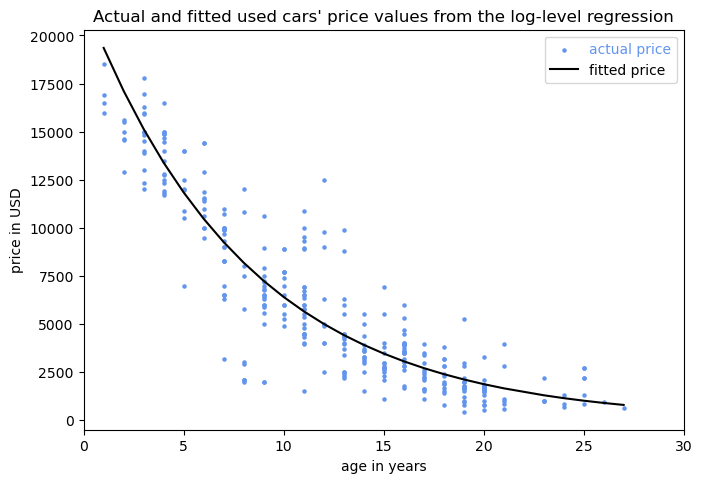

In [54]:
fig = plt.figure(figsize = (6,4))
ax = fig.add_axes([0,0,1,1])
ax.scatter(x = data_chicago.age, y = data_chicago.price, color = 'cornflowerblue', s = 5, label = 'actual price')
ax.plot(data_chicago.age, price_hat, color = 'k', label = 'fitted price')
plt.title('Actual and fitted used cars\' price values from the log-level regression')
plt.legend(labelcolor = ['cornflowerblue', 'black'])
plt.xlabel('age in years')
plt.xlim(0, 30)
plt.ylabel('price in USD');

##### The above graph shows the best fit transformed into original values or exponential terms and the actual data. Log-Level regression did a great job in capturing the negative relationship between price and age

<hr>

#### Weighted regression

##### We are using odometer (how much km is driven) weights to estimate the regression parameters. 

In [55]:
regression_weighted = smf.wls(formula = 'price ~ age', data= data_chicago, weights = data_chicago.odometer).fit(cov_type = 'HC0')

In [56]:
print(regression_weighted.summary())

                            WLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.645
Model:                            WLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     346.4
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           6.51e-53
Time:                        17:58:40   Log-Likelihood:                -2938.8
No. Observations:                 322   AIC:                             5882.
Df Residuals:                     320   BIC:                             5889.
Df Model:                           1                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.164e+04    437.801     26.585      0.0

### Interpretation

- `intercept` - used cars that are new cost are expected to cost approximately 11640 USD, on average, holding everything fixed and considering weights in odometer. 
    - Also, it is statistically significant based on p-value of 0.000 which means it strongly affects price. 
<br><br>
- `age` - used cars that get older by 1 year are expected to be approximately 509.26 USD less expensive, on average, holding everything fixed and considering/factoring weights in odometer. 
    - Also, it is statistically significant based on p-value of 0.000 which means it strongly affects price.
<br><br>
- `R-squared = 0.645` - 64.5% of the variation in price is captured by the model. 

<hr>

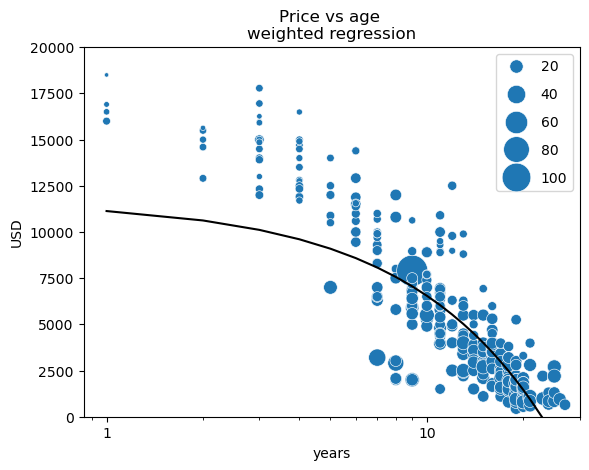

In [57]:
g = sns.scatterplot(x = 'age', y= 'price', data = data_chicago, size = 'odometer', sizes = (10,500))
plt.plot(data_chicago.age, regression_weighted.fittedvalues, color = 'k')
plt.semilogx()
xlabels = ['{:,.0f}'.format(x) for x in g.get_xticks()]
g.set_xticklabels(xlabels)
plt.title('Price vs age \nweighted regression')
plt.xlim(0, 30)
plt.ylim(0, 20000)
plt.legend(labelspacing = 1)
plt.xlabel('years');
plt.ylabel('USD');

### The above graph shows the weighted regression of price vs age with odometer weights. The larger weights in odometer illustrates non-linear negative relationship between price and age.

<hr>

### Regression 3: Polynomial of order 2

`lnprice` vs (`age` and `agesq`)

In [58]:
regression_quadratic = smf.ols(formula = 'lnprice ~ age + agesq', data = data_chicago).fit(cov_type = 'HC0')

In [59]:
print(regression_quadratic.summary())

                            OLS Regression Results                            
Dep. Variable:                lnprice   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     839.8
Date:                Sun, 08 Dec 2024   Prob (F-statistic):          7.71e-128
Time:                        17:58:40   Log-Likelihood:                -169.15
No. Observations:                 322   AIC:                             344.3
Df Residuals:                     319   BIC:                             355.6
Df Model:                           2                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.9859      0.056    179.500      0.0

### Interpretation

- `intercept` - if we interpret it in exponential term, used cars that are new cost are expected to cost approximately e<sup>9.9859</sup> USD or 21718.1 USD, on average, holding everything fixed. 
    - Also, it is statistically significant based on p-value of 0.000 which means it strongly affects price.
<br>
<br>
- `age` - used cars that get older by 1 year are expected to be approximately 13.85% less expensive, on average, holding everything fixed and assuming that the `agesq` has minimal effect. 
    - Also, it is statistically significant based on p-value of 0.000 which means it strongly affects price.
<br>
<br>
- `agesq` - shows the curvature of the best fit that it is upward or U-shaped. 
    - Also, it is not statistically significant based ond high p-value of 0.294 which means it does not strongly affects price.
<br>
<br>
- `R-squared = 0.761` - 76.1% of the variation in lnprice is captured by the model. 

<hr>

##### Getting fitted values transforming into exponential terms

In [60]:
data_chicago['quadratic_prediction'] = regression_quadratic.fittedvalues

In [61]:
quadratic_price_hat = regression_quadratic.fittedvalues

In [62]:
regression_quadratic.resid

0     -0.022807
1     -0.112993
2     -0.137008
3     -0.168031
4     -0.095951
         ...   
317    0.988269
318    0.988269
319    0.783474
320    0.050447
321   -0.223565
Length: 322, dtype: float64

In [63]:
quadratic_residual_variance = np.var(regression_quadratic.resid)
quadratic_residual_variance

0.1674217448115565

In [64]:
quadratic_price_hat = [math.exp(x)*math.exp(quadratic_residual_variance/2) for x in quadratic_price_hat]

In [65]:
quadratic_price_hat[:10]

[20573.79551915216,
 20573.79551915216,
 20573.79551915216,
 20573.79551915216,
 17946.19624499121,
 17946.19624499121,
 17946.19624499121,
 17946.19624499121,
 17946.19624499121,
 17946.19624499121]

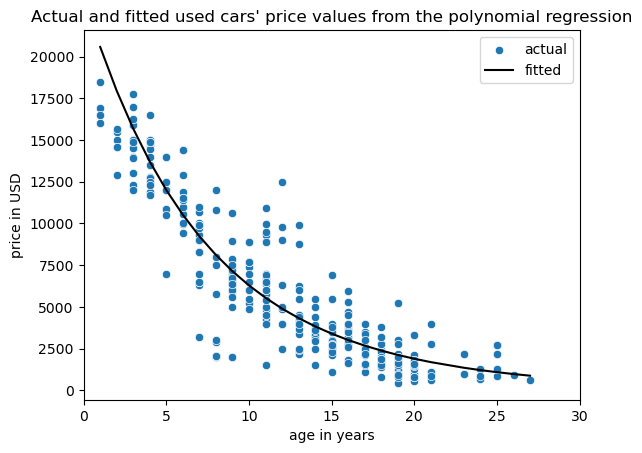

In [66]:
g = sns.scatterplot(x = 'age', y= 'price', data = data_chicago)
plt.plot(data_chicago.age, quadratic_price_hat, color = 'k')
plt.title('Actual and fitted used cars\' price values from the polynomial regression')
plt.legend(labels = ['actual', 'fitted'])
plt.xlabel('age in years')
plt.xlim(0, 30)
plt.ylabel('price in USD');

### The above graph shows the polynomial regression of order 2 price vs age and agesq. It clearly best fits the negative relationship between price and age.


<hr>

### Regression 4: Linear Spline

##### **Linear spline in `age`**

##### Knots [9, 13, 19] are chosen because of more occurences and for the purposes of testing more segmented spline. 

In [67]:
regression_3 = smf.ols(formula = 'lnprice ~ lspline(age, [9,13,19])', data = data_chicago).fit(cov_type = 'HC0')

In [68]:
y_hat_spline = regression_3.predict()

In [69]:
print(regression_3.summary())

                            OLS Regression Results                            
Dep. Variable:                lnprice   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     505.4
Date:                Sun, 08 Dec 2024   Prob (F-statistic):          3.78e-136
Time:                        17:58:40   Log-Likelihood:                -161.80
No. Observations:                 322   AIC:                             333.6
Df Residuals:                     317   BIC:                             352.5
Df Model:                           4                                         
Covariance Type:                  HC0                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

### Interpretation

- `intercept` - if we interpret it in exponential term, used cars that are new cost are expected to cost approximately e<sup>10.0216</sup> USD or 22507.4 USD, on average, holding everything fixed. 
    - Also, it is statistically significant based on p-value of 0.000 which means it strongly affects price.
<br>
<br>
- `lspline(age, [9, 13, 19])[0]` - used cars that are less than 9 years are expected to be approximately 14.51% less expensive, on average, holding everything fixed. 
    - Also, it is statistically significant based on p-value of 0.000 which means it strongly affects price.
<br>
<br>
- `lspline(age, [9, 13, 19])[1]` -  used cars that are between 9 and 13 years are expected to be approximately 6.69% less expensive, on average, holding everything fixed. 
    - Also, it is statistically significant based ond high p-value of 0.005 which means it strongly affects price.
<br>
<br>
- `lspline(age, [9, 13, 19])[2]` - sed cars that are between 13 and 19 years are expected to be approximately 17.78% less expensive, on average, holding everything fixed. 
    - Also, it is statistically significant based ond high p-value of 0.000 which means it strongly affects price.
<br>
<br>
- `lspline(age, [9, 13, 19])[3]` - sed cars that are greater than 19 years are expected to be approximately 5.27% less expensive, on average, holding everything fixed. 
    - Also, it statistically significant based ond high p-value of 0.048 which means it strongly affects price.
<br><br>
- `R-squared = 0.771` - 77.1% of the variation in lnprice is captured by the model. 

<hr>

#### Comparing regression models

In [70]:
stargazer = Stargazer([regression_1, regression_2, regression_quadratic, regression_3])
stargazer.rename_covariates(
    {
        'Intercept': 'Constant',
        'agesq': 'age squared',
        'lspline(age, [9, 13, 19])[0]': 'age spline < 9',
        'lspline(age, [9, 13, 19])[1]': 'age spline 9–13',
        'lspline(age, [9, 13, 19])[2]': 'age spline 13-19',
        'lspline(age, [9, 13, 19])[3]': 'age spline > 19',
    }
)
stargazer

##### Four models are compared in the above output: 
- Level-level regression (`price` vs `age`):                         
    - R2 = 0.745	
- Log-level regression (`lnprice` vs `age`):                         
    - R2 = 0.760	
- Polynomial regression (`lnprice` vs `age` and `agesq`):            
    - R2 = 0.761	
- Linear spline regression (`lnprice` vs `spline(age, [9,13,19])`):  
    - R2 = 0.771. The best model out of 4

<hr>

#### Comparing regression lines

``add lowess``

In [71]:
regression_4 = sm.nonparametric.lowess
y_hat_lowess_ln = regression_4(data_chicago.lnprice, data_chicago.age)
y_hat_lowess_ln[0:10]

array([[1.        , 9.82240642],
       [1.        , 9.82240642],
       [1.        , 9.82240642],
       [1.        , 9.82240642],
       [2.        , 9.70618292],
       [2.        , 9.70618292],
       [2.        , 9.70618292],
       [2.        , 9.70618292],
       [2.        , 9.70618292],
       [2.        , 9.70618292]])

In [72]:
y_hat_lowess_ln = [x[1] for x in y_hat_lowess_ln]

In [73]:
y_hat_age_ln = regression_2.predict()
y_hat_agesq = regression_quadratic.predict()
y_hat_spline = regression_3.predict()

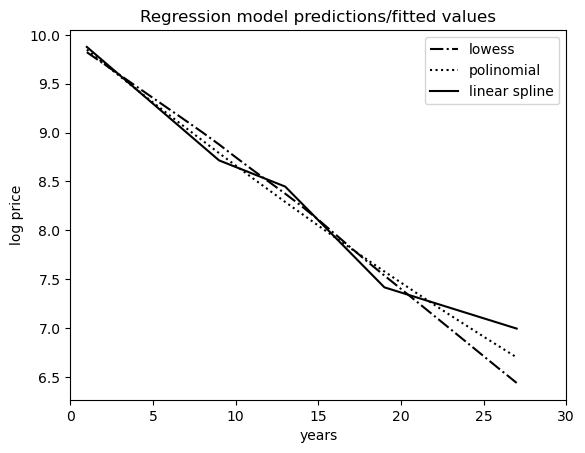

In [74]:
fig, ax = plt.subplots()
ax.plot(data_chicago.age, y_hat_lowess_ln, color = 'k', linestyle = '-.', label = 'lowess')
ax.plot(data_chicago.age, y_hat_agesq, color = 'k', linestyle = ':', label = 'polinomial')
ax.plot(data_chicago.age, y_hat_spline, color = 'k', linestyle = '-', label = 'linear spline')
plt.xlim(0, 30)
plt.legend()
plt.xlabel('years')
plt.ylabel('log price')
plt.title('Regression model predictions/fitted values');

##### The different regression models differently well capture the negative relationship between `lnprice` and `age`. Spline method well captures `lnprice` for specific age intervals. 

<hr>

### Confidence and prediction intervals

##### Our best-performing model is the regression with linear spline (regression_3). We are using this model for getting the _confidence_ and the _prediction_ intervals.  

In [75]:
data_chicago_summary_frame = regression_3.get_prediction().summary_frame()

In [76]:
data_chicago_summary_frame

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,9.876518,0.039228,9.799634,9.953403,9.082771,10.670266
1,9.876518,0.039228,9.799634,9.953403,9.082771,10.670266
2,9.876518,0.039228,9.799634,9.953403,9.082771,10.670266
3,9.876518,0.039228,9.799634,9.953403,9.082771,10.670266
4,9.731416,0.029750,9.673108,9.789724,8.939252,10.523580
...,...,...,...,...,...,...
317,7.100606,0.136532,6.833009,7.368204,6.266501,7.934712
318,7.100606,0.136532,6.833009,7.368204,6.266501,7.934712
319,7.100606,0.136532,6.833009,7.368204,6.266501,7.934712
320,7.047868,0.161291,6.731743,7.363994,6.196952,7.898785


<hr>

### **Confidence interval**

##### Remember: `confidence interval` is the measure of uncertertainty regarding the _conditional expected value_ of log price. The word _condtional_ refers to a fact that we are looking for the expected value of log price for a _given age_ (expected log price conditional on age). This is NOT the area where our datapoint should lie, as the value of an individual observation depends on the _general patter_ AND _noise_. This is the **uncertainty of the general pattern**. This uncertainty stems from the fact that we only have a sample of all possible members of the underlying population, and this sample is, by definition, noisy. This noisiness of the sample leads to uncertainty regarding the general pattern. 

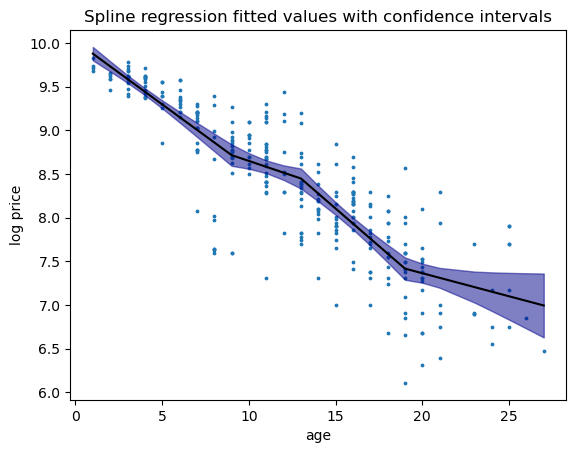

In [77]:
fig, ax = plt.subplots()
ax.scatter(data_chicago.age, data_chicago.lnprice, s = 3)
ax.plot(data_chicago.age, data_chicago_summary_frame['mean'], color = 'k', linestyle = '-')
ax.fill_between(data_chicago.age, data_chicago_summary_frame.mean_ci_lower, data_chicago_summary_frame.mean_ci_upper, color = 'darkblue', alpha = 0.5)
plt.title('Spline regression fitted values with confidence intervals')
plt.xlabel('age')
plt.ylabel('log price');

<hr>

### **Prediction interval**

##### The `prediction interval` is the uncertainty around the *individual observation*. Since $data = pattern + noise$, the value of individual observations will have additional uncertainty on top of the uncertain pattern. This is why the prediction interval is way wider than the confidence interval. 

In summary:

$$
    \begin{equation}
    \text{prediction  interval = uncertain pattern + additional uncertainty from noisiness}
    \end{equation}
$$

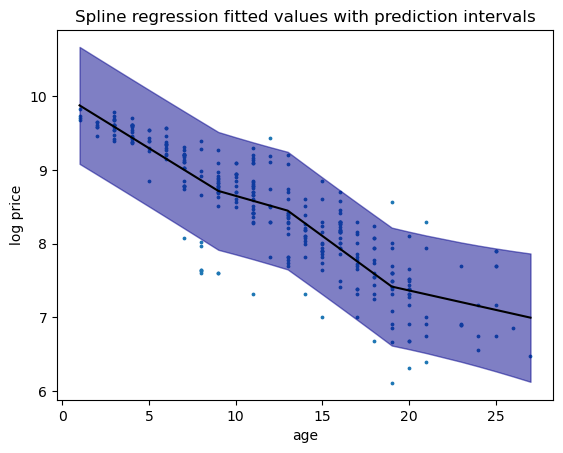

In [78]:
fig, ax = plt.subplots()
ax.scatter(data_chicago.age, data_chicago.lnprice, s = 3)
ax.plot(data_chicago.age, data_chicago_summary_frame['mean'], color = 'k', linestyle = '-')
ax.fill_between(data_chicago.age, data_chicago_summary_frame.obs_ci_lower, data_chicago_summary_frame.obs_ci_upper, color = 'darkblue', alpha = 0.5)
plt.title('Spline regression fitted values with prediction intervals')
plt.xlabel('age')
plt.ylabel('log price');

<hr>

**Confidence interval for the polinomial model**

In [79]:
summary_frame_egression_quadratic = regression_quadratic.get_prediction().summary_frame()

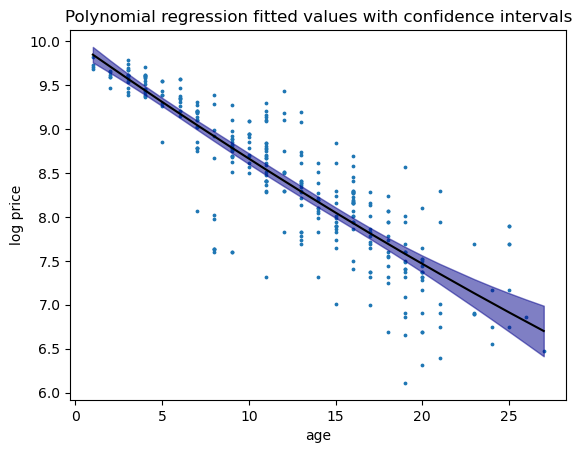

In [80]:
fig, ax = plt.subplots()
ax.scatter(data_chicago.age, data_chicago.lnprice, s = 3)
ax.plot(data_chicago.age, summary_frame_egression_quadratic['mean'], color = 'k', linestyle = '-')
ax.fill_between(data_chicago.age, summary_frame_egression_quadratic.mean_ci_lower, summary_frame_egression_quadratic.mean_ci_upper, color = 'darkblue', alpha = 0.5)
plt.title('Polynomial regression fitted values with confidence intervals')
plt.xlabel('age')
plt.ylabel('log price');

<hr>

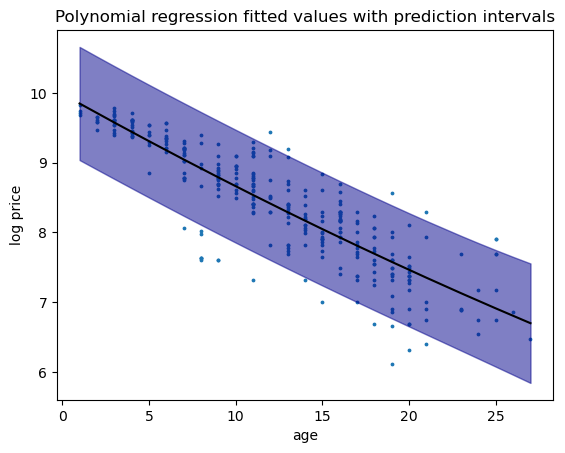

In [81]:
fig, ax = plt.subplots()
ax.scatter(data_chicago.age, data_chicago.lnprice, s = 3)
ax.plot(data_chicago.age, summary_frame_egression_quadratic['mean'], color = 'k', linestyle = '-')
ax.fill_between(data_chicago.age, summary_frame_egression_quadratic.obs_ci_lower, summary_frame_egression_quadratic.obs_ci_upper, color = 'darkblue', alpha = 0.5)
plt.title('Polynomial regression fitted values with prediction intervals')
plt.xlabel('age')
plt.ylabel('log price');

<hr>

### External validity

##### How does the spline model perform on the `los angeles` dataset?

In [82]:
regression_3_2 = smf.ols(formula = 'lnprice ~ lspline(age, [9,13,19])', data = data_los_angeles).fit(cov_type = 'HC0')

In [83]:
print(regression_3_2.summary())

                            OLS Regression Results                            
Dep. Variable:                lnprice   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     54.47
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           9.64e-32
Time:                        17:58:40   Log-Likelihood:                -311.70
No. Observations:                 222   AIC:                             633.4
Df Residuals:                     217   BIC:                             650.4
Df Model:                           4                                         
Covariance Type:                  HC0                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [84]:
print(f'Spline model R2 on the chicago dataset: {regression_3.rsquared:.3f}')
print(f'Spline model R2 on the los angeles dataset: {regression_3_2.rsquared:.3f}')

Spline model R2 on the chicago dataset: 0.771
Spline model R2 on the los angeles dataset: 0.309


##### Interpretation
- `Chicago` dataset: 
    - `R_2` = 0.771. The spline model well captures the 77.1% of variability. 
<br><br>

- `Los Angeles` dataset:
    - `R_2` = 0.309. The spline model performance dropped to 30.9%. This might be due to several reasons:
        <br><br>
        - the model is focused on Chicago dataset taking all specific characteristics into consideration negatively affecting the generalization to other dataset thus reducing the model performance. 
        - there might be market differences in two location such as demand for some cars in one place than in other
<br><br>

- `Summary`: The poor performance of Los Angeles dataset based on R_2 shows limited external validity and the spline model needs to take specific characterstics of Los Angeles into consideration .

<hr>

##### And how about the polinomial model?

In [85]:
regression_quadratic_2 = smf.ols(formula = 'lnprice ~ age + agesq', data = data_los_angeles).fit(cov_type = 'HC0')

In [86]:
print(regression_quadratic_2.summary())

                            OLS Regression Results                            
Dep. Variable:                lnprice   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     91.82
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           1.10e-29
Time:                        17:58:40   Log-Likelihood:                -313.11
No. Observations:                 222   AIC:                             632.2
Df Residuals:                     219   BIC:                             642.4
Df Model:                           2                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.6478      0.274     35.234      0.0

In [87]:
print(f'Spline model R2 on the chicago dataset: {regression_quadratic.rsquared:.3f}')
print(f'Spline model R2 on the los angeles dataset: {regression_quadratic_2.rsquared:.3f}')

Spline model R2 on the chicago dataset: 0.761
Spline model R2 on the los angeles dataset: 0.300


##### Interpretation
- `Chicago` dataset: 
    - `R_2` = 0.761. The quadratic model well captures the 76.1% of variability. 
<br><br>

- `Los Angeles` dataset:
    - `R_2` = 0.300. The quadratic model performance dropped to 30%. This might be due to several reasons:
        <br><br>
        - the model is focused on Chicago dataset taking all specific characteristics into consideration negatively affecting the generalization to other dataset thus reducing the model performance. 
        - there might be market differences in two location such as demand for some cars in one place than in other
<br><br>

- `Summary`: The poor performance of Los Angeles dataset based on R_2 shows limited external validity and the quadratic model needs to take specific characterstics of Los Angeles into consideration .

<hr>

#### Putting it all together: regressions in the two datasets

In [88]:
data_total_r = pd.DataFrame(
    data = [
        [regression_quadratic.rsquared, regression_3.rsquared],
        [regression_quadratic_2.rsquared, regression_3_2.rsquared]
    ], 
    columns = ['polinomial', 'spline'],
    index = ['chicago', 'los angeles']
).map('{:.3f}'.format)
data_total_r.index.name = 'R2'
data_total_r

,polinomial,spline
R2,,
chicago,0.761,0.771
los angeles,0.300,0.309


<hr>

### `Summary`

- The `used-cars` dataset was analyzed:
<br>

    - firstly, looking at Chicago by adjusting models based on its specific characterists such as dropping outliers
    - secondly, extending the models to Los Angeles dataset to check for external validity
<br><br>

- Different models were trained such as `level-level`, `log-level`, `quadratic`, `spline`, `weighted`. Also, `lowess` was used to compare with regression model best fits. 
- The _Confidence Intervals_ and _Prediction Intervals_ were generate to eyeball the uncertainties around models' estimated coefficients and predictive range.
- After training all models, then first 4 models were compared to choose the best performed model `spline`. Then, this model is applied for Los Angeles case to check for external validity but it failed due to specific model training pertaiting to Chicago case. 